In [ ]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 18.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=8397f5f890bc3ad97f9f2b8f67aa7c1e3fa018efd17f80f050f304f25a43f7a1
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


input the speed (0 to 100)  : 56
enter the sterring angle (-45 to 45 ) : 20
Torque assistance: 49.61432397579605%


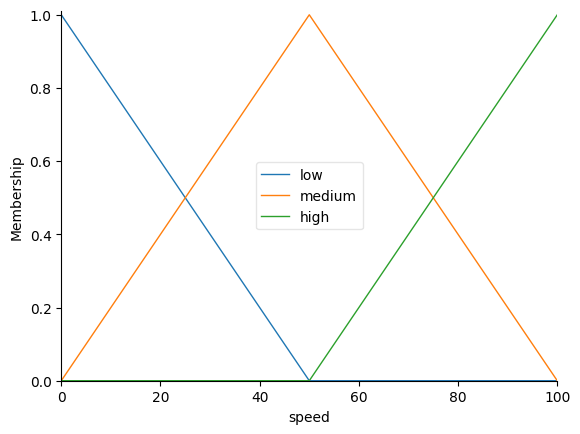

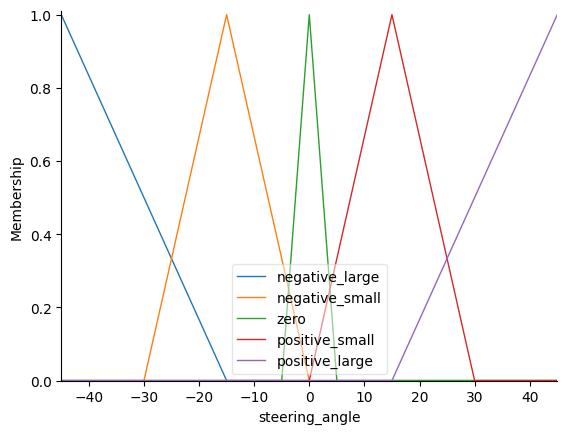

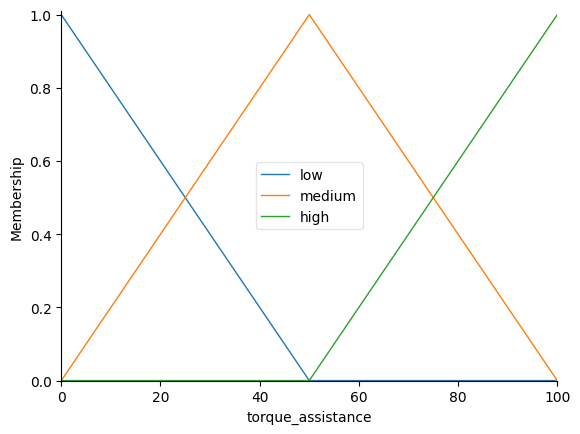

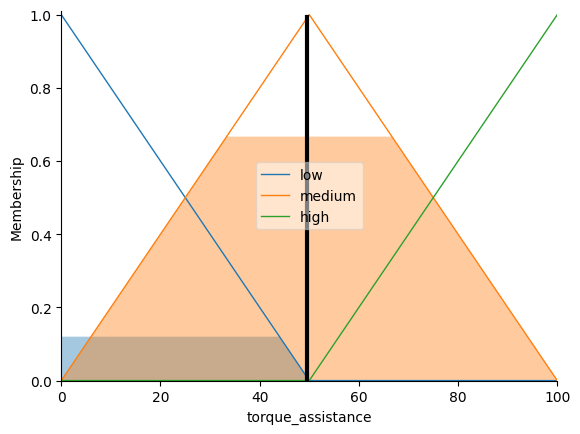

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Define the input variables
speed = ctrl.Antecedent(np.arange(0, 101, 1), 'speed')  # Vehicle speed in km/h
steering_angle = ctrl.Antecedent(np.arange(-45, 46, 1), 'steering_angle')  # Steering angle in degrees

# Define the output variable
torque_assistance = ctrl.Consequent(np.arange(0, 101, 1), 'torque_assistance')  # Torque assistance in percentage

# Define membership functions for speed
speed['low'] = fuzz.trimf(speed.universe, [0, 0, 50])
speed['medium'] = fuzz.trimf(speed.universe, [0, 50, 100])
speed['high'] = fuzz.trimf(speed.universe, [50, 100, 100])
speed.view()

# Define membership functions for steering angle
steering_angle['negative_large'] = fuzz.trimf(steering_angle.universe, [-45, -45, -15])
steering_angle['negative_small'] = fuzz.trimf(steering_angle.universe, [-30, -15, 0])
steering_angle['zero'] = fuzz.trimf(steering_angle.universe, [-5, 0, 5])
steering_angle['positive_small'] = fuzz.trimf(steering_angle.universe, [0, 15, 30])
steering_angle['positive_large'] = fuzz.trimf(steering_angle.universe, [15, 45, 45])
steering_angle.view()

# Define membership functions for torque assistance
torque_assistance['low'] = fuzz.trimf(torque_assistance.universe, [0, 0, 50])
torque_assistance['medium'] = fuzz.trimf(torque_assistance.universe, [0, 50, 100])
torque_assistance['high'] = fuzz.trimf(torque_assistance.universe, [50, 100, 100])
torque_assistance.view()
# Define fuzzy rules
rules = [
    ctrl.Rule(speed['low'] & steering_angle['negative_large'], torque_assistance['high']),
    ctrl.Rule(speed['low'] & steering_angle['negative_small'], torque_assistance['high']),
    ctrl.Rule(speed['low'] & steering_angle['zero'], torque_assistance['medium']),
    ctrl.Rule(speed['low'] & steering_angle['positive_small'], torque_assistance['high']),
    ctrl.Rule(speed['low'] & steering_angle['positive_large'], torque_assistance['high']),

    ctrl.Rule(speed['medium'] & steering_angle['negative_large'], torque_assistance['medium']),
    ctrl.Rule(speed['medium'] & steering_angle['negative_small'], torque_assistance['medium']),
    ctrl.Rule(speed['medium'] & steering_angle['zero'], torque_assistance['low']),
    ctrl.Rule(speed['medium'] & steering_angle['positive_small'], torque_assistance['medium']),
    ctrl.Rule(speed['medium'] & steering_angle['positive_large'], torque_assistance['medium']),

    ctrl.Rule(speed['high'] & steering_angle['negative_large'], torque_assistance['low']),
    ctrl.Rule(speed['high'] & steering_angle['negative_small'], torque_assistance['low']),
    ctrl.Rule(speed['high'] & steering_angle['zero'], torque_assistance['low']),
    ctrl.Rule(speed['high'] & steering_angle['positive_small'], torque_assistance['low']),
    ctrl.Rule(speed['high'] & steering_angle['positive_large'], torque_assistance['low']),
]

# Create the control system
torque_control = ctrl.ControlSystem(rules)
torque_simulation = ctrl.ControlSystemSimulation(torque_control)

# Input values

input_speed =float(input("input the speed (0 to 100)  : ") ) # Example speed in km/h
input_steering_angle =float(input("enter the sterring angle (-45 to 45 ) : "))  # Example steering angle in degrees

# Pass inputs to the control system
torque_simulation.input['speed'] = input_speed
torque_simulation.input['steering_angle'] = input_steering_angle

# Compute the result
torque_simulation.compute()

# Output the result
print(f"Torque assistance: {torque_simulation.output['torque_assistance']}%")
torque_assistance.view(sim=torque_simulation)


